# **LangChain**

In [2]:
from dotenv import load_dotenv

load_dotenv()

True

## **Summarize messages**

In [3]:
from langchain.agents import create_agent
from langgraph.checkpoint.memory import InMemorySaver
from langchain.agents.middleware import SummarizationMiddleware

In [4]:
agent = create_agent(
    model="gpt-5-nano",
    checkpointer=InMemorySaver(),

    middleware=[
        SummarizationMiddleware(
            model="gpt-4o-mini",
            trigger=("tokens", 100),
            keep=("messages", 1)
        )
    ]

)

In [5]:
from langchain.messages import HumanMessage, AIMessage
from pprint import pprint

In [6]:
response = agent.invoke(
    {"messages": [
        HumanMessage(content="What is the capital of the moon?"),
        AIMessage(content="The capital of the moon is Lunapolis."),
        HumanMessage(content="What is the weather in Lunapolis?"),
        AIMessage(content="Skies are clear, with a high of 120C and a low of -100C."),
        HumanMessage(content="How many cheese miners live in Lunapolis?"),
        AIMessage(content="There are 100,000 cheese miners living in Lunapolis."),
        HumanMessage(content="Do you think the cheese miners' union will strike?"),
        AIMessage(content="Yes, because they are unhappy with the new president."),
        HumanMessage(content="If you were Lunapolis' new president how would you respond to the cheese miners' union?"),
        ]},
    {"configurable": {"thread_id": "1"}}
)

pprint(response)

{'messages': [HumanMessage(content='Here is a summary of the conversation to date:\n\nThe capital of the moon is Lunapolis. The weather in Lunapolis features clear skies, with a high of 120C and a low of -100C. There are 100,000 cheese miners living in Lunapolis, and they may strike due to dissatisfaction with the new president.', additional_kwargs={}, response_metadata={}, id='d7bb2083-66cc-483b-afc5-dff96599b89b'),
              HumanMessage(content="If you were Lunapolis' new president how would you respond to the cheese miners' union?", additional_kwargs={}, response_metadata={}, id='18430be5-3a4a-4aa4-b949-36019dc5e064'),
              AIMessage(content='If I were Lunapolis’ new president, I’d treat the Cheese Miners’ Union as a respected partner and aim for a swift, fair, and sustainable resolution. Here’s a practical plan I would follow.\n\nKey principles\n- Safety first: ensure every worker goes home safe. Any concessions must not compromise safety.\n- Respect and transparency:

In [7]:
print(response["messages"][-1].content)

If I were Lunapolis’ new president, I’d treat the Cheese Miners’ Union as a respected partner and aim for a swift, fair, and sustainable resolution. Here’s a practical plan I would follow.

Key principles
- Safety first: ensure every worker goes home safe. Any concessions must not compromise safety.
- Respect and transparency: open dialogue, no surprises, clear data on costs, benefits, and constraints.
- Shared prosperity: fair compensation, benefits, and working conditions linked to productivity and risk.
- Predictability and accountability: establish concrete timelines, measurable goals, and a clear dispute-resolution process.
- Preserve essential services: keep cheese production steady while negotiations continue.

Immediate actions (first 2–3 weeks)
- Create a joint Cheese Miners Negotiation Council with union reps, management, and a neutral mediator (if requested).
- Publicly acknowledge the miners’ concerns and commit to a good-faith negotiating process.
- Freeze or limit discipl

## **Trim/delete messages**

In [8]:
from typing import Any
from langchain.agents import AgentState
from langchain.messages import RemoveMessage
from langgraph.runtime import Runtime
from langchain.agents.middleware import before_agent
from langchain.messages import ToolMessage

In [9]:
@before_agent
def trim_message(state: AgentState, runtime: Runtime) -> dict[str, Any]:
    """Remove all the tool message from the state"""

    messages = state["messages"]

    tool_messages = [m for m in messages if isinstance(m, ToolMessage)]
    return { "messages": [RemoveMessage(id=m.id) for m in tool_messages] }

In [10]:
agent = create_agent(
    model="gpt-5-nano",
    checkpointer=InMemorySaver(),
    middleware=[trim_message],
)

In [11]:
response = agent.invoke(
    {"messages": [
        HumanMessage(content="My device won't turn on. What should I do?"),
        ToolMessage(content="blorp-x7 initiating diagnostic ping…", tool_call_id="1"),
        AIMessage(content="Is the device plugged in and turned on?"),
        HumanMessage(content="Yes, it's plugged in and turned on."),
        ToolMessage(content="temp=42C voltage=2.9v … greeble complete.", tool_call_id="2"),
        AIMessage(content="Is the device showing any lights or indicators?"),
        HumanMessage(content="What's the temperature of the device?")
        ]},
    {"configurable": {"thread_id": "2"}}
)

pprint(response)

{'messages': [HumanMessage(content="My device won't turn on. What should I do?", additional_kwargs={}, response_metadata={}, id='96fbe144-2153-4eb2-9790-65f45f390920'),
              AIMessage(content='Is the device plugged in and turned on?', additional_kwargs={}, response_metadata={}, id='ca3bbc25-4640-44d9-80ff-56ee331a002c'),
              HumanMessage(content="Yes, it's plugged in and turned on.", additional_kwargs={}, response_metadata={}, id='9d7e25f7-29c1-43bb-acca-5216d13533ce'),
              AIMessage(content='Is the device showing any lights or indicators?', additional_kwargs={}, response_metadata={}, id='bdfb4b3e-e6f5-444a-a763-f5d65515eda0'),
              HumanMessage(content="What's the temperature of the device?", additional_kwargs={}, response_metadata={}, id='8d44c5e9-fd42-4730-ad7a-a2151c2d5a5a'),
              AIMessage(content='I can’t read the device’s internal temperature from here. If it can’t power on, you won’t be able to read its temperature anyway. You can,

In [12]:
print(response["messages"][-1].content)

I can’t read the device’s internal temperature from here. If it can’t power on, you won’t be able to read its temperature anyway. You can, however, take these steps to troubleshoot and reduce overheating risk:

- If it feels hot, power it off and unplug it. Let it cool for 15–30 minutes before trying again.
- Try a different power adapter and/or outlet to rule out a faulty charger or outlet.
- Disconnect all peripherals (USB devices, HDMI, etc.). Do a hard reset: press and hold the power button for 15–20 seconds, then try turning it on again.
- If it’s a laptop with a removable battery, remove the battery, plug in the charger, and try to power on with only the charger connected.
- Check for any indicator lights or beeps when you attempt to power it on and note the pattern. Refer to your device manual for what the codes mean.
- Look for obvious signs of damage, burning smell, or liquid exposure. If you see any, stop and seek service.

If you can share more details (device type, model, a

# **LangGraph**

In [99]:
from langgraph.graph import START, StateGraph, END
from langgraph.checkpoint.memory import InMemorySaver
from langgraph.prebuilt import ToolNode, tools_condition
from langchain.agents.middleware import SummarizationMiddleware
from langchain_classic.prompts import ChatPromptTemplate
from langgraph.graph.message import add_messages
from langchain_core.tools import tool
from langchain_core.messages import BaseMessage, SystemMessage, ToolMessage
from langchain_openai import ChatOpenAI
from typing_extensions import TypedDict
from typing import Annotated, List
from IPython.display import Markdown
import tiktoken

In [89]:
llm = ChatOpenAI(model="gpt-5-nano", max_completion_tokens=512)

In [90]:
class AgentState(TypedDict):
    messages: Annotated[List[BaseMessage], add_messages]

In [91]:
def count_tokens(messages: List[BaseMessage]) -> int:
    """Approximate token counter."""
    encoding = tiktoken.get_encoding("cl100k_base")
    return sum(len(encoding.encode(str(m))) for m in messages)

In [108]:
def summarization_middleware_node(state: AgentState) -> AgentState:
    """
    Custom middleware node: Summarizes if >100 tokens, keeps 1 recent msg + summary.
    """
    messages = state["messages"]
    if count_tokens(messages) <= 100 or len(messages) <= 2:
        return state  # No change

    # Prompt for summary
    summary_prompt = ChatPromptTemplate.from_template(
        "Summarize this conversation history in 1-2 sentences, preserving key facts:\n\n{history}"
    )

    summary_llm = ChatOpenAI(model="gpt-4o-mini", max_completion_tokens=512)

    chain = summary_prompt | summary_llm

    history_str = "\n".join([f"{m.type}: {m.content}" for m in messages[:-1]])  # Exclude last
    summary = chain.invoke({"history": history_str})

    # New state: Summary (as SystemMessage) + last msg
    new_messages = [
        SystemMessage(content=f"Conversation summary: {summary.content}"),
        messages[-1]  # Keep latest
    ]
    return {"messages": new_messages}


In [109]:
def chatNode(state: AgentState) -> AgentState:
    response = llm.invoke(state["messages"])
    return {"messages": [response]}

tools = []

In [ ]:
graph = StateGraph(AgentState)

graph.add_node("llm", chatNode)
graph.add_node("SummarizationMiddleware", summarization_middleware_node)
graph.add_node("tools", ToolNode(tools))

graph.add_edge(START, "SummarizationMiddleware")
graph.add_edge("SummarizationMiddleware", "llm")
graph.add_conditional_edges("llm", tools_condition)
graph.add_edge("llm", END)

workflow = graph.compile(checkpointer=InMemorySaver())

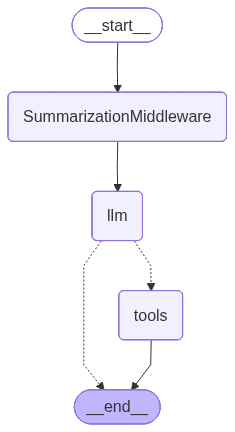

In [111]:
workflow

In [113]:
test_messages = [
    HumanMessage(content="Check my device status"),
    AIMessage(
        content="Running diagnostics...",
        tool_calls=[{
            "id": "diag_1",
            "name": "run_diagnostic",
            "args": {}
        }]
    ),
    ToolMessage(
        content="temp=42C voltage=2.9v status=normal",
        tool_call_id="diag_1"
    ),
    HumanMessage(content="Is 42C normal?"),
    AIMessage(content="Yes, 42C is safe for most devices."),
    HumanMessage(content="What about 80C?"),
    HumanMessage(content="And what if it's not turning on?"),
    HumanMessage(content="Also check battery level"),
]

# Now invoke — should work!
response = workflow.invoke(
    {"messages": test_messages},
    {"configurable": {"thread_id": "test1"}}
)

print(response["messages"][-1].content)

ValidationError: 19 validation errors for HumanMessage
content.str
  Input should be a valid string [type=string_type, input_value=AIMessage(content='', add...: 0, 'reasoning': 512}}), input_type=AIMessage]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].0.str
  Input should be a valid string [type=string_type, input_value=('content', ''), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].0.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('content', ''), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].1.str
  Input should be a valid string [type=string_type, input_value=('additional_kwargs', {'refusal': None}), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].1.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('additional_kwargs', {'refusal': None}), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].2.str
  Input should be a valid string [type=string_type, input_value=('response_metadata', {'t...gth', 'logprobs': None}), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].2.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('response_metadata', {'t...gth', 'logprobs': None}), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].3.str
  Input should be a valid string [type=string_type, input_value=('type', 'ai'), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].3.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('type', 'ai'), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].4.str
  Input should be a valid string [type=string_type, input_value=('name', None), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].4.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('name', None), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].5.str
  Input should be a valid string [type=string_type, input_value=('id', 'lc_run--019b46b1-...61-89a9-f1f0a69e4038-0'), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].5.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('id', 'lc_run--019b46b1-...61-89a9-f1f0a69e4038-0'), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].6.str
  Input should be a valid string [type=string_type, input_value=('tool_calls', []), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].6.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('tool_calls', []), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].7.str
  Input should be a valid string [type=string_type, input_value=('invalid_tool_calls', []), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].7.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('invalid_tool_calls', []), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].8.str
  Input should be a valid string [type=string_type, input_value=('usage_metadata', {'inpu...: 0, 'reasoning': 512}}), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].8.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('usage_metadata', {'inpu...: 0, 'reasoning': 512}}), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type

In [112]:
response

{'messages': [HumanMessage(content='Check my device status', additional_kwargs={}, response_metadata={}, id='b6022d2d-d650-4e99-8af6-ca3884a1eeff'),
  AIMessage(content='Running diagnostics...', additional_kwargs={}, response_metadata={}, id='78b8fa42-9575-4b99-8718-ba98caed274e', tool_calls=[{'name': 'run_diagnostic', 'args': {}, 'id': 'diag_1', 'type': 'tool_call'}]),
  ToolMessage(content='temp=42C voltage=2.9v status=normal', id='1e12a35a-69f2-474e-b1fd-c5c48cd96e17', tool_call_id='diag_1'),
  HumanMessage(content='Is 42C normal?', additional_kwargs={}, response_metadata={}, id='60ab9352-7ce5-46b4-873a-ce9feca9c9d9'),
  AIMessage(content='Yes, 42C is safe for most devices.', additional_kwargs={}, response_metadata={}, id='46b9fd4d-67ba-4556-93ff-be83c4564a93'),
  HumanMessage(content='What about 80C?', additional_kwargs={}, response_metadata={}, id='1a0b7025-494f-4724-8093-94dd65125217'),
  HumanMessage(content="And what if it's not turning on?", additional_kwargs={}, response_meta

In [101]:
Markdown(response["messages"][-1].content)

['The temperature of my device is 42C. What should I do?',
 "My device won't turn on. What should I do?",
 'Is the device plugged in and turned on?',
 "Yes, it's plugged in and turned on.",
 'Is the device showing any lights or indicators?',
 "What's the temperature of the device?",
 'If you’re referring to the same reading you mentioned earlier, the temperature is 42°C. That’s warm but not usually dangerous by itself. If the device won’t turn on, overheating could have triggered a protective shutdown, or there could be another issue.\n\nWhat you can do now:\n- Power down and unplug the device. If possible, remove the battery and let it cool for 15–30 minutes in a well-ventilated area.\n- Check vents and fans. Look for dust blocking the intake/exhaust and gently clean with compressed air if you can.\n- Make sure the device has good airflow. Don’t use it on a bed, couch, or any soft surface.\n- After it’s cooled, try turning it on again. If it still won’t start, try a power cycle: hold 